In [1]:
from pathlib import Path
import os
DATA_PATH = Path('./dat/')
DATA_PATH.mkdir(exist_ok =True)
#if not os.path.exists('./dat/aclImdb_v1.tar.gz'):
if not os.path.exists('./dat/aclImdb'):
    !curl -O http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
    !tar -xf aclImdb_v1.tar.gz -C {DATA_PATH}

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 80.2M  100 80.2M    0     0  48.1M      0  0:00:01  0:00:01 --:--:-- 48.1M


The data is already split into train/test. Moreover, we have 3 class folders:

- pos

- neg

- unsup (no specific label)

Let's have a look on the raw data:

`.glob()` function is used to retrieve files and directories that match a specific pattern. It is part of the glob module in Python's standard library.
* Example --> txt_files = glob.glob('*.txt')
* for file in txt_files: print(file)
* Output --> eturns a list of all the files in the current directory that have the .txt extension.



* `encoding='utf-8'`  is used to specify the character encoding of a file or a string. UTF-8 is a widely used encoding that can represent any character in the Unicode standard, making it suitable for handling text data in different languages.

* `encoding='utf-8'` ensures that the file is read or written using UTF-8 encoding.

In [2]:
import numpy as np
CLASSES = ['neg' ,'pos'] #,'unsup']
PATH=Path('./dat/aclImdb/')
def get_texts(path):
  texts ,labels = [] ,[]
  for idx , label in enumerate(CLASSES):
    for fname in (path/label).glob('*.*'):
      #texts.append(fixup(fname.open('r',encoding='utf-8').read()))
      texts.append(fname.open('r', encoding='utf-8').read())
      labels.append(idx)
      #return np.array(texts), np.array(labels)
      return texts , labels

* Divided To (`train_text` , `train_labels`)
* Divided To (`test_text`  , `test_labels` )

In [3]:
train_text , train_labels =get_texts(PATH/'train')
test_text  , test_labels  =get_texts(PATH/'test')

**Show 10 First Rows From `train_text`

In [6]:
for t in train_text[:10]:
  print( '\n' + t + '\n')


Typical thriller, has been done many times before. Simple plot outline; cop Liotta becomes obsessed with Russell's wife, and he tries to bump off good ol' Kurt so he can have her. This is beyond predictable, it doesn't even try to make you guess, the plot is the plot and there's no thinking outside the box here. I guess then the only reason to watch it is to see how it develops, but nothing is done originally or interestingly. There's not really anything to say about this film, it's not particularly bad, but there's no good points either. Russell plays Russell and you know what you're gonna get when you see him in a film. Ditto Liotta. Stowe has an annoying Cher-esque voice. I read the plot outline and I could see the film in my head, it was so obvious and basic. I watched it and it rolled out in front of my eyes exactly as I had imagined. I felt not a drop of emotion throughout. I have no feeling towards this film, it's as if I never even watched it. Considering this, it's a pretty p

# So what it takes to go from the raw form to the prepared form?

__A - Text preprocessing__

1- Data sequencing: each sentence --> sequence (list) of words

2- Data cleaning: This step varies from task to task. For some tasks it's better to remove special characters and punctuations, for other they are critical (emotiocons). Good for perfromance.

3- Text normalization: in general text morphology is a big issue in NLP. Upper and lower cases, stemming and lemmatization, ...etc. Again it's task dependent.

4- Padding (model dependent): Dense and CNN. RNN can skip this step.

__B- Text preparation__

5- Binarization/vectorization/digitization: transform words into numbers according to a vocab index.


# Text preprocessing

In this phase, we apply some operations on the text, to make it in the most usable form for the task at hand. Mainly we clean it up to be more appealing to the problem we try to solve. The input is __text__ and the output is a transformed __text__.

# Splitting text into sequence
* **Manual (split on white spaces)**

In [7]:
s = train_text[0]
s.split()

['Typical',
 'thriller,',
 'has',
 'been',
 'done',
 'many',
 'times',
 'before.',
 'Simple',
 'plot',
 'outline;',
 'cop',
 'Liotta',
 'becomes',
 'obsessed',
 'with',
 "Russell's",
 'wife,',
 'and',
 'he',
 'tries',
 'to',
 'bump',
 'off',
 'good',
 "ol'",
 'Kurt',
 'so',
 'he',
 'can',
 'have',
 'her.',
 'This',
 'is',
 'beyond',
 'predictable,',
 'it',
 "doesn't",
 'even',
 'try',
 'to',
 'make',
 'you',
 'guess,',
 'the',
 'plot',
 'is',
 'the',
 'plot',
 'and',
 "there's",
 'no',
 'thinking',
 'outside',
 'the',
 'box',
 'here.',
 'I',
 'guess',
 'then',
 'the',
 'only',
 'reason',
 'to',
 'watch',
 'it',
 'is',
 'to',
 'see',
 'how',
 'it',
 'develops,',
 'but',
 'nothing',
 'is',
 'done',
 'originally',
 'or',
 'interestingly.',
 "There's",
 'not',
 'really',
 'anything',
 'to',
 'say',
 'about',
 'this',
 'film,',
 "it's",
 'not',
 'particularly',
 'bad,',
 'but',
 "there's",
 'no',
 'good',
 'points',
 'either.',
 'Russell',
 'plays',
 'Russell',
 'and',
 'you',
 'know',
 'wh

__Notice how punctuation is preserved!__

Do we care to have 'movie.', instead of 'movie.' or 'movie,'?

Actually we do!

As you have already had an idea from previous excercise on clean IMDB, we use vocabulary to binarize the words (word2index).

Having such punctuations mandates that we have 2 entries in the vocab for the word movie. This has 2 issues:

1- Increased vocab size--> sparse features and more memory

2- What other forms we account for: 'movie!', 'movie:',...etc. Those are different and unexpected morphologies.

__Remember, we aim at normalizing the text to common format as much as possible (like lower)__

## Using regex

We could escape this trap by keeping only the words, using a regex:

* `The re module` in Python provides support for regular expressions. Regular expressions are powerful tools for pattern matching and string manipulation. They allow you to search, match, and manipulate strings based on specific patterns.
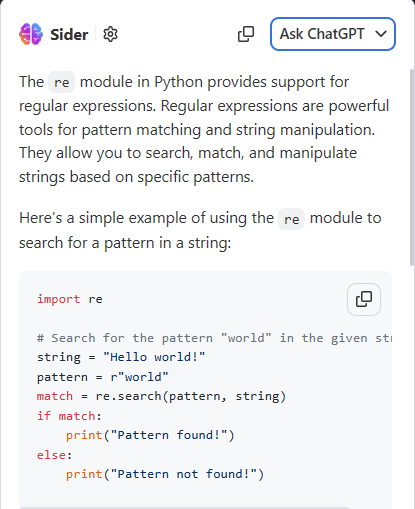

In [8]:
import re
re.split(r'\W+',s)

['Typical',
 'thriller',
 'has',
 'been',
 'done',
 'many',
 'times',
 'before',
 'Simple',
 'plot',
 'outline',
 'cop',
 'Liotta',
 'becomes',
 'obsessed',
 'with',
 'Russell',
 's',
 'wife',
 'and',
 'he',
 'tries',
 'to',
 'bump',
 'off',
 'good',
 'ol',
 'Kurt',
 'so',
 'he',
 'can',
 'have',
 'her',
 'This',
 'is',
 'beyond',
 'predictable',
 'it',
 'doesn',
 't',
 'even',
 'try',
 'to',
 'make',
 'you',
 'guess',
 'the',
 'plot',
 'is',
 'the',
 'plot',
 'and',
 'there',
 's',
 'no',
 'thinking',
 'outside',
 'the',
 'box',
 'here',
 'I',
 'guess',
 'then',
 'the',
 'only',
 'reason',
 'to',
 'watch',
 'it',
 'is',
 'to',
 'see',
 'how',
 'it',
 'develops',
 'but',
 'nothing',
 'is',
 'done',
 'originally',
 'or',
 'interestingly',
 'There',
 's',
 'not',
 'really',
 'anything',
 'to',
 'say',
 'about',
 'this',
 'film',
 'it',
 's',
 'not',
 'particularly',
 'bad',
 'but',
 'there',
 's',
 'no',
 'good',
 'points',
 'either',
 'Russell',
 'plays',
 'Russell',
 'and',
 'you',
 'k

* **This is better. But imagine have the following:**



In [9]:
s = 'human-like robots are dump'
re.split(r'\W+', s)

['human', 'like', 'robots', 'are', 'dump']

* **This is completely opposite meaning!!**

In [10]:
s = "What's on your mind?"
re.split(r'\W+', s)

['What', 's', 'on', 'your', 'mind', '']

* The 's is split.

* Also the ? is removed!

Removing punctuations altogether is not what we want.

For sentiment for example, those symbols might be the reason of classfication:

- 'What a moview :)'

- 'What a movie!'



## Split by white spaces and remove punctuations

For the example above, if we want to keep 'What's' but get rid of the punctuations like ? we can use regex to filter punctuations.

We can use:

* String Punctuations Are ==> `!"#$%&'()*+,-./:;<=>?@[\]^_` `{|}~`
* In Python, `the import string` -->  statement allows you to access various string-related functions and constants provided by the string module. This module contains a collection of useful string operations that are commonly used in Python programming.

In [11]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

* `Remove Punctuations From each word`

In [13]:
re_punc = re.compile('[%s]' % re.escape(string.punctuation))
#Remove Punctuations From Each Word
statment = "what's on your mind?"
stripped = [re_punc.sub('',w) for w in statment.split()]
stripped

['whats', 'on', 'your', 'mind']

In [15]:
statment_1 = 'human-like robots are dump'
stripped = [re_punc.sub('',w) for w in statment_1.split()]
stripped

['humanlike', 'robots', 'are', 'dump']

* **See how human-like is translated into humanlike, which somehow keeps the meaning.**

# Case normalization
One of the important and easy normalization is to convert all case to common case. `Mostly lower case` . This has the effect of `reducing the vocabulary size`, and also `reduct Out-Of-Vocab (OOV)`.

For example, if our vocab is as follows:

In [16]:
v = {'the':1, 'cat':2, 'mat':3}

* `Now if we try to binarize the following sentence:`

In [17]:
s = 'The CAT sat on the mat'

In [18]:
x = [v[w] for w in s.split()]
x

KeyError: ignored

* `To avoid OOV, we can add special term: '_UNK_' for unknown words:`

In [19]:
v = {'the':1, 'cat':2, 'sat': 3, 'on': 4, 'mat':5}

In [20]:
x = []

for w in s.split():
  if w in v:
    x.append(v[w])
  else:
    x.append(0)
x

[0, 0, 3, 4, 1, 5]

* As you can see, 'The' and 'Cat' are mapped as UNK. While they are already in the vocab.

* To workaround this, we try to get all the text to a common morphology:

In [21]:
x = []

for w in s.lower().split():
  if w in v:
    x.append(v[w])
  else:
    x.append(0)
x

[1, 2, 3, 4, 1, 5]